## **Sommaire**

1. [Import](#Import)
2. [Clustering](#Clustering)
    1. [Chargement de données](#Chargement-de-données)  
    2. [K-means](#K-means)
       1. [RFM](#RFM)
       2. [RFM + Variables numériques](#RFM-+-Variables-numériques)
       3. [RFM + Variables numériques + Variables catégorielles](#RFM-+-Variables-numériques-+-Variables-catégorielles)
    4. [T-SNE](#T-SNE)
       1. [RFM T-SNE](#RFM-T-SNE)
       2. [RFM + Variables numériques T-SNE](#RFM-+-Variables-numériques-T-SNE)
       3. [RFM + Variables numériques + Variables catégorielles T-SNE](#RFM-+-Variables-numériques-+-Variables-catégorielles-T-SNE)
    5. [DBSCAN](#DBSCAN)  

## **Import**

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import DBSCAN
import hdbscan

# Configuration d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## **Clustering**

### Chargement des données

In [5]:
# Charger les fichiers CSV exportés
rfm = pd.read_csv('rfm_export.csv')
rfm.head()

,Recency,Frequency,Monetary
0,0.714894,-0.26322,-0.374347
1,1.627605,-0.26322,0.484922
2,-0.086988,-0.26322,0.290755
3,-1.429978,-0.26322,-0.592298
4,2.155674,-0.26322,0.295028


In [7]:
# Charger les fichiers CSV exportés
rfm_df = pd.read_csv('rfm_df_export.csv')
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,customer_zip_code_prefix,review_score,Weighted_Review_Score,Loyalty_Index,Payment_credit_card,Payment_debit_card,Payment_voucher,Category_Electronics and Technology,Category_Fashion and Accessories,Category_Food and Beverages,Category_Health and Beauty,Category_Home and Furniture,Category_Industry and Business,Category_Others,Category_Sports and Outdoor,Category_Toys and Entertainment
0,0.714894,-0.26322,-0.374347,2,1,2,-0.239742,0.672171,0.162736,-0.615072,True,False,False,False,False,False,False,False,False,True,False,False
1,1.627605,-0.26322,0.484922,1,1,5,-0.650432,-0.078967,-0.245750,-0.739293,True,False,False,False,False,False,False,False,False,True,False,False
2,-0.086988,-0.26322,0.290755,3,1,5,0.016914,0.672171,0.162736,-0.402313,True,False,False,False,False,False,False,True,False,False,False,False
3,-1.429978,-0.26322,-0.592298,5,1,1,-0.745168,-0.078967,-0.245750,1.605167,True,False,False,False,False,False,True,False,False,False,False,False
4,2.155674,-0.26322,0.295028,1,1,5,-0.735973,0.672171,0.162736,-0.785587,True,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# Charger les fichiers CSV exportés
rfm_no_cat = pd.read_csv('rfm_no_cat_export.csv')
rfm_no_cat.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,customer_zip_code_prefix,review_score,Weighted_Review_Score,Loyalty_Index
0,0.714894,-0.26322,-0.374347,2,1,2,-0.239742,0.672171,0.162736,-0.615072
1,1.627605,-0.26322,0.484922,1,1,5,-0.650432,-0.078967,-0.245750,-0.739293
2,-0.086988,-0.26322,0.290755,3,1,5,0.016914,0.672171,0.162736,-0.402313
3,-1.429978,-0.26322,-0.592298,5,1,1,-0.745168,-0.078967,-0.245750,1.605167
4,2.155674,-0.26322,0.295028,1,1,5,-0.735973,0.672171,0.162736,-0.785587


In [11]:
# Charger les fichiers CSV exportés
RFM_Score = pd.read_csv('RFM_Score_export.csv')
RFM_Score.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,0.714894,-0.26322,-0.374347,-0.712148,-0.3012,-0.704847
1,1.627605,-0.26322,0.484922,-1.419621,-0.3012,1.414270
2,-0.086988,-0.26322,0.290755,-0.004675,-0.3012,1.414270
3,-1.429978,-0.26322,-0.592298,1.410271,-0.3012,-1.411220
4,2.155674,-0.26322,0.295028,-1.419621,-0.3012,1.414270


### K-means

#### RFM

Utilisons la méthode Elbow afin de déterminer le nombre optimal de clusters :

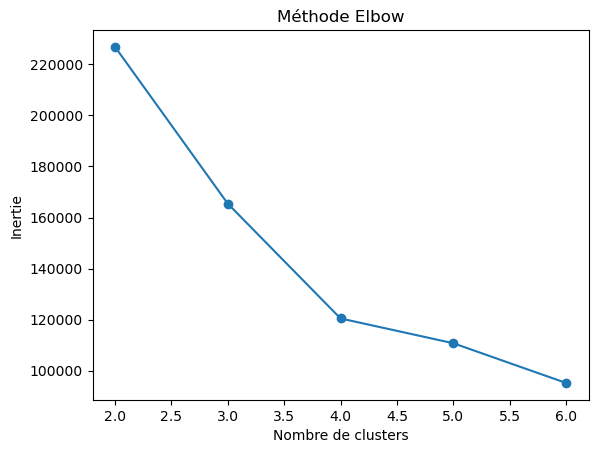

In [30]:
# Calcul de l'inertie pour différents nombres de clusters
inertia = []
for k in range(2, 7):  # Tester entre 2 et 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    inertia.append(kmeans.inertia_)

# Visualiser la courbe Elbow
plt.plot(range(2, 7), inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


On retiendra ici 4 clusters.

In [34]:
# Appliquer K-means sur l'échantillon avec 4 clusters
kmeans_sample = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans_sample.fit_predict(rfm)

In [36]:
# Calculer les métriques
silhouette_avg = silhouette_score(rfm.drop(columns=['Cluster']), rfm['Cluster'])
distortion = kmeans_sample.inertia_
# Afficher les métriques
print(f"Silhouette Score: {silhouette_avg}")
print(f"Distortion (Inertia): {distortion}")

Silhouette Score: 0.4385150659375751
Distortion (Inertia): 120484.38914812777


Observations :

    Qualité des clusters (Silhouette Score) :

La qualité des clusters est acceptable mais pourrait être améliorée.

    Compactness (Inertia) :

L'inertie montre que les points sont regroupés autour de leurs centres.

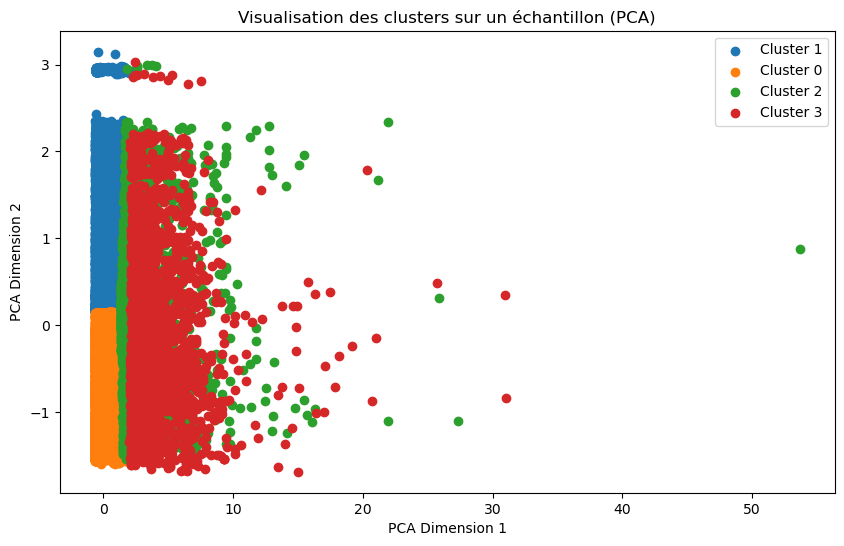

In [40]:
# Réduction des dimensions avec PCA
pca = PCA(n_components=2)
sample_pca = pca.fit_transform(rfm.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
for cluster in rfm['Cluster'].unique():
    plt.scatter(
        sample_pca[rfm['Cluster'] == cluster, 0],
        sample_pca[rfm['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Visualisation des clusters sur un échantillon (PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.show()

Observations

   - Le Cluster rouge est le plus dominant en termes de densité et d'étendue, ce qui peut refléter une forte hétérogénéité ou une mauvaise séparation.
   - Les clusters bleu, orange et vert semblent mieux délimités, indiquant une plus grande homogénéité dans ces groupes.

#### RFM + Variables numériques

Utilisons la méthode Elbow afin de déterminer le nombre optimal de clusters :

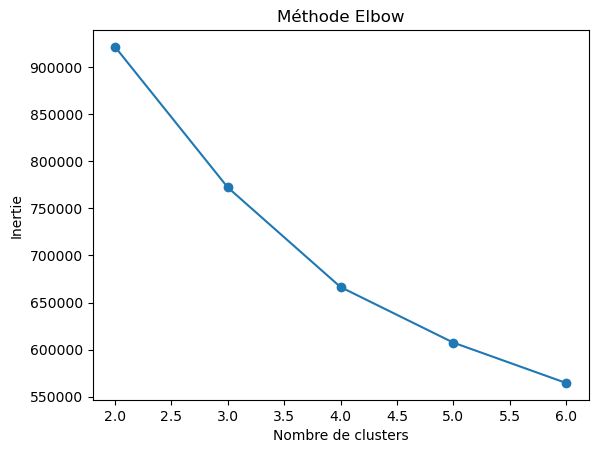

In [52]:
# Calcul de l'inertie pour différents nombres de clusters
inertia = []
for k in range(2, 7):  # Tester entre 2 et 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_no_cat)
    inertia.append(kmeans.inertia_)

# Visualiser la courbe Elbow
plt.plot(range(2, 7), inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Ici le graphique est moins clair. On pourrait hésité entre 3 et 4 clusters. On décidera d'en choisir 4.

In [44]:
# Appliquer K-means sur l'échantillon avec 4 clusters
kmeans_sample = KMeans(n_clusters=4, random_state=42)
rfm_no_cat['Cluster'] = kmeans_sample.fit_predict(rfm_no_cat)

In [46]:
# Calculer les métriques
silhouette_avg = silhouette_score(rfm_no_cat.drop(columns=['Cluster']), rfm_no_cat['Cluster'])
distortion = kmeans_sample.inertia_

# Afficher les métriques
print(f"Silhouette Score: {silhouette_avg}")
print(f"Distortion (Inertia): {distortion}")

Silhouette Score: 0.19865450231761175
Distortion (Inertia): 666471.9284129585


Observations :

    Qualité des clusters (Silhouette Score) :

La qualité des clusters faible et pourrait être améliorée.

    Compactness (Inertia) :

L'inertie montre que les points ne sont pas très bien regroupés autour de leurs centres.

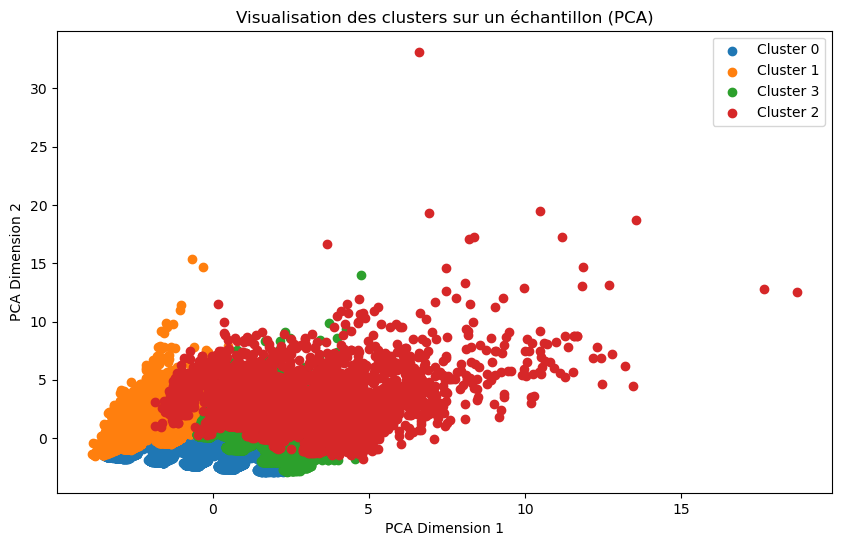

In [90]:
# Réduction des dimensions avec PCA
pca = PCA(n_components=2)
sample_pca = pca.fit_transform(rfm_no_cat.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
for cluster in rfm_no_cat['Cluster'].unique():
    plt.scatter(
        sample_pca[rfm_no_cat['Cluster'] == cluster, 0],
        sample_pca[rfm_no_cat['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Visualisation des clusters sur un échantillon (PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.show()

Observations :

    - Le cluster rouge est le cluster dominant, avec une grande densité et une forte dispersion.
Il semble inclure des observations très variées, ce qui peut indiquer un regroupement moins homogène.

    - Le cluster orange est relativement compact, situé en bas à gauche du graphique.
Ce cluster semble bien défini et peu dispersé.

    - Le cluster bleu est très compact et bien délimité, positionné encore plus bas à gauche.
Ce cluster contient des observations très similaires.

    - Le cluster vert semble très dispersé, avec seulement quelques points visibles dans le graphique.
Pourrait représenter un groupe marginal ou des observations atypiques.

#### RFM + Variables numériques + Variables catégorielles

Utilisons la méthode Elbow afin de déterminer le nombre optimal de clusters :

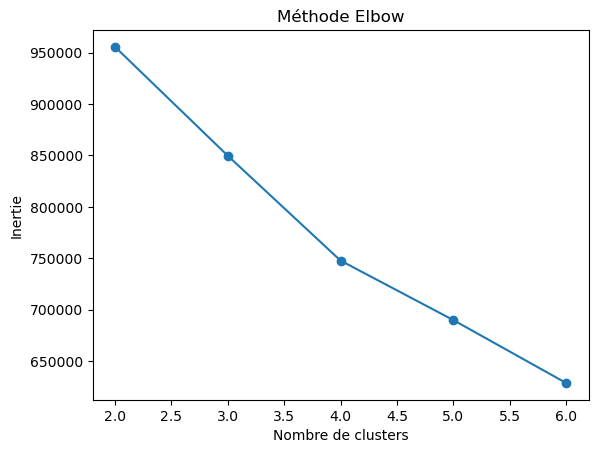

In [50]:
# Calcul de l'inertie pour différents nombres de clusters
inertia = []
for k in range(2, 7):  # Tester entre 2 et 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df)
    inertia.append(kmeans.inertia_)

# Visualiser la courbe Elbow
plt.plot(range(2, 7), inertia, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Ici le nombre de cluster optimal semble être de 4.

In [58]:
# Appliquer K-means sur l'échantillon avec 3 clusters
kmeans_sample = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans_sample.fit_predict(rfm_df)

In [60]:
# Calculer les métriques
silhouette_avg = silhouette_score(rfm_df.drop(columns=['Cluster']), rfm_df['Cluster'])
distortion = kmeans_sample.inertia_

# Afficher les métriques
print(f"Silhouette Score: {silhouette_avg}")
print(f"Distortion (Inertia): {distortion}")

Silhouette Score: 0.18986522196586683
Distortion (Inertia): 747730.8681194185


Observations :

    Qualité des clusters (Silhouette Score) :

La qualité des clusters faible et pourrait être améliorée.

    Compactness (Inertia) :

L'inertie montre que les points ne sont pas très bien regroupés autour de leurs centres.

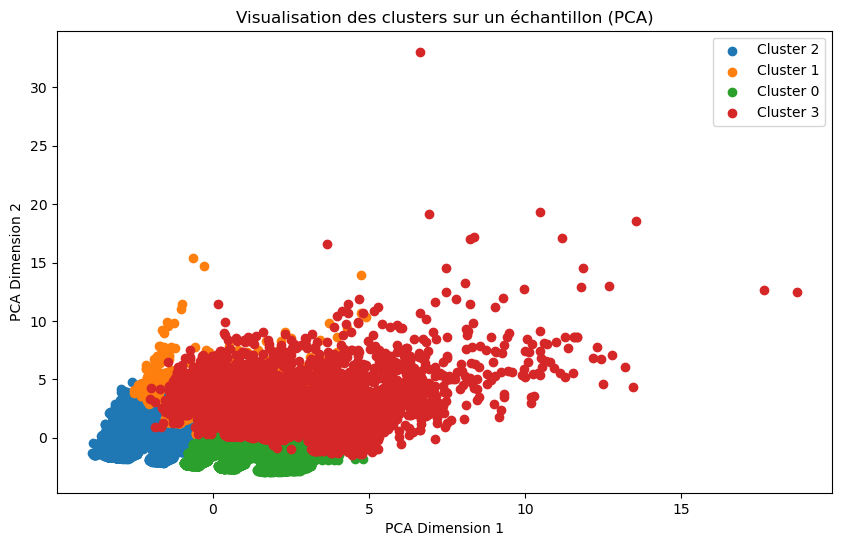

In [62]:
# Réduction des dimensions avec PCA
pca = PCA(n_components=2)
sample_pca = pca.fit_transform(rfm_df.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
for cluster in rfm_df['Cluster'].unique():
    plt.scatter(
        sample_pca[rfm_df['Cluster'] == cluster, 0],
        sample_pca[rfm_df['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Visualisation des clusters sur un échantillon (PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.show()

### T-SNE

Après l'utilisation du K-Means on observe des résultats qui ne nous apporte pas entière satisfaction. Essayons d'améliorer nos résultat avec T-SNE

#### RFM T-SNE

In [14]:
# Appliquer K-means pour créer des clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)

In [16]:
# Appliquer t-SNE pour réduire les dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(rfm.drop(columns=['Cluster'], errors='ignore')) 

In [18]:
# Créer un DataFrame pour visualiser les résultats
data_tsne_df = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])
if 'Cluster' in rfm.columns:
    data_tsne_df['Cluster'] = rfm.loc[data_tsne_df.index, 'Cluster']

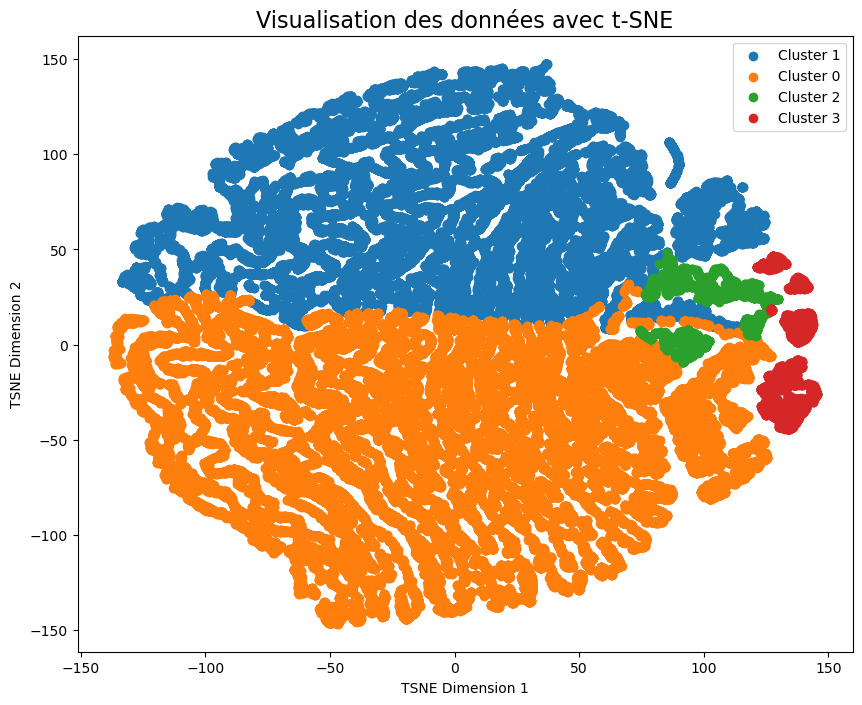

In [20]:
plt.figure(figsize=(10, 8))

# Tracer les points par cluster
for cluster in data_tsne_df['Cluster'].unique():
    plt.scatter(
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE1'],
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE2'],
        label=f'Cluster {cluster}'
    )

plt.title("Visualisation des données avec t-SNE", fontsize=16)
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()

Observations :

    - Clusters principaux (bleu et orange) :
        Les clusters bleu (Cluster 1) et orange (Cluster 0) dominent en taille et sont bien séparés dans l’espace t-SNE.
        Ils forment des structures denses et étendues, suggérant des groupes bien définis dans l'ensemble des données.

    - Clusters plus petits (vert et rouge) :
        Les clusters vert (Cluster 2) et rouge (Cluster 3) sont nettement plus petits et localisés dans une région proche.
        Cela peut indiquer des sous-groupes spécifiques ou des groupes minoritaires dans les données.

In [22]:
# Calculer les moyennes des features par cluster
cluster_summary = rfm.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_summary)

Statistiques descriptives par cluster :
          Recency  Frequency  Monetary
Cluster                               
0       -0.715408  -0.120659 -0.130302
1        0.985788  -0.115402 -0.132048
2        0.011004  -0.035950  4.511401
3       -0.020924   4.995769  0.608778


Observations :

    - Cluster 0 et 1 :
    Ces deux clusters représentent des clients à faible valeur. Le Cluster 0 est plus récent, tandis que le Cluster 1 semble plus inactif.
    Ces clients peuvent nécessiter des campagnes pour les réactiver ou les fidéliser.

    - Cluster 2 :
    Ce cluster est stratégique car il regroupe les gros dépensiers. Bien que leur fréquence d’achat soit faible, leur contribution monétaire est significative.

    - Cluster 3 :
    Ce cluster regroupe des clients réguliers et fidèles, qui méritent d’être récompensés pour leur activité fréquente.

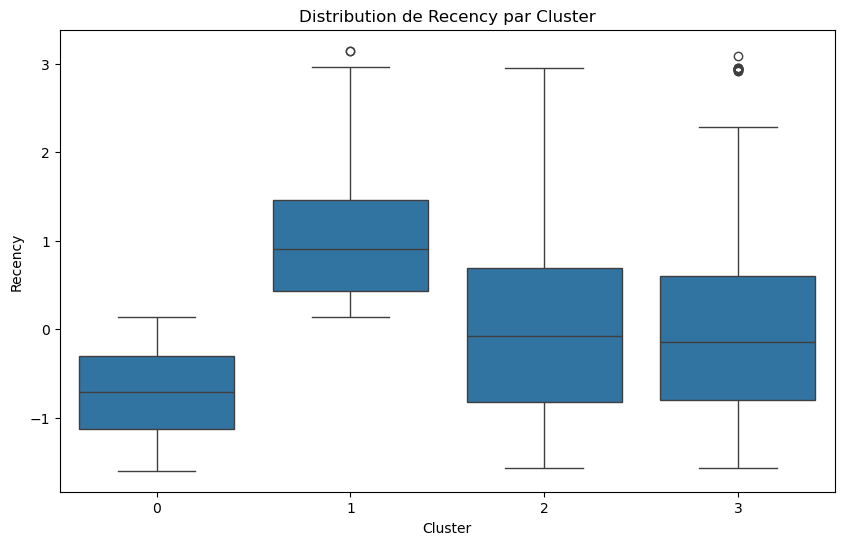

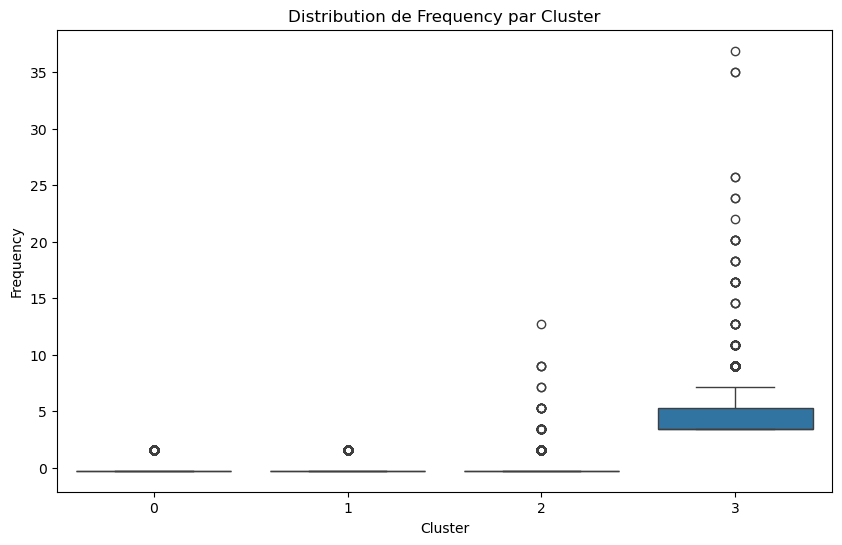

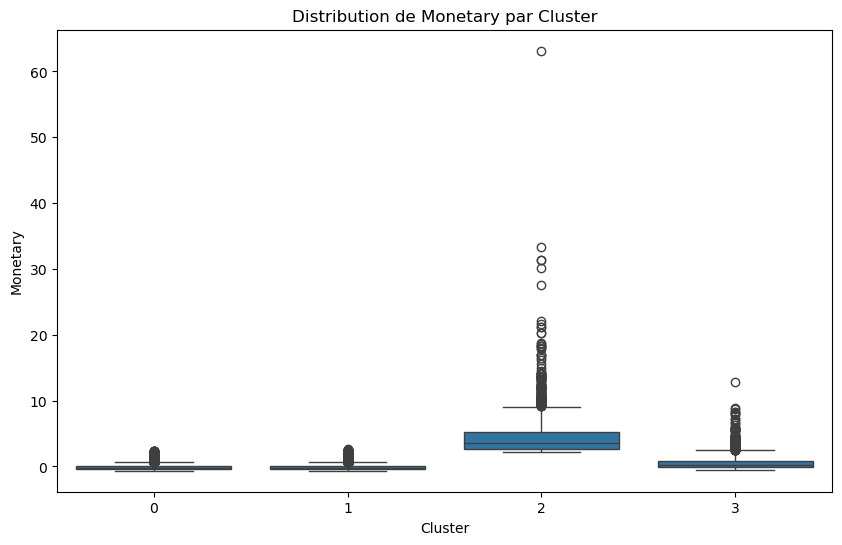

In [26]:
# Liste des features à visualiser
features_to_plot = ['Recency', 'Frequency', 'Monetary'] 

# Création de boxplots pour chaque feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=rfm)
    plt.title(f"Distribution de {feature} par Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

#### RFM + Variables numériques T-SNE

In [28]:
# Appliquer K-means pour créer des clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_no_cat['Cluster'] = kmeans.fit_predict(rfm_no_cat) 

In [32]:
# Appliquer t-SNE pour réduire les dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(rfm_no_cat.drop(columns=['Cluster'], errors='ignore')) 

In [34]:
# Créer un DataFrame pour visualiser les résultats
data_tsne_df = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])
if 'Cluster' in rfm_no_cat.columns:  
    data_tsne_df['Cluster'] = rfm_no_cat.loc[data_tsne_df.index, 'Cluster']

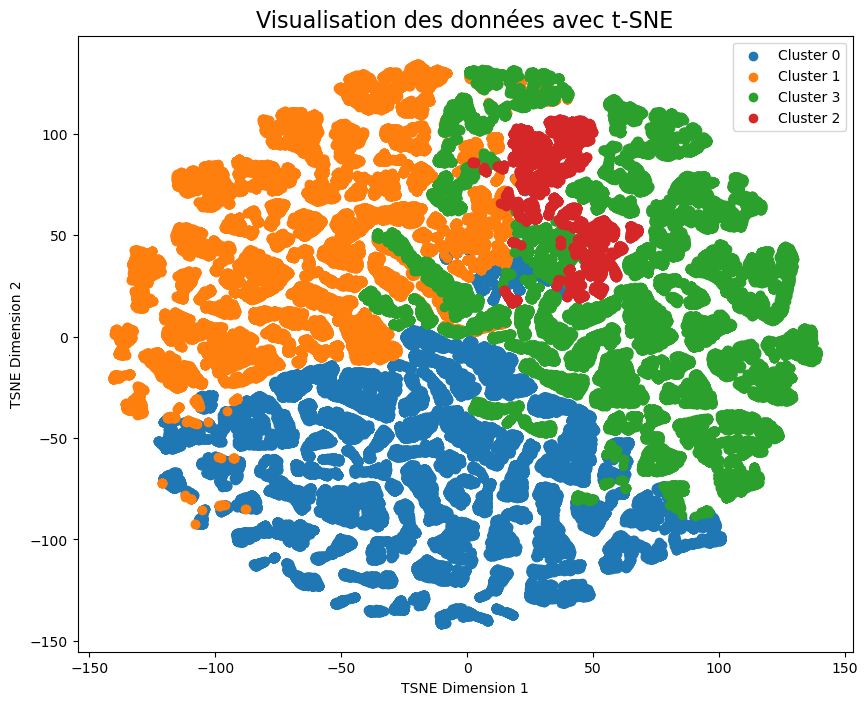

In [36]:
plt.figure(figsize=(10, 8))

# Tracer les points par cluster
for cluster in data_tsne_df['Cluster'].unique():
    plt.scatter(
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE1'],
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE2'],
        label=f'Cluster {cluster}'
    )

plt.title("Visualisation des données avec t-SNE", fontsize=16)
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()

Observations :

    - Cluster 0 
     Cela peut représenter un groupe homogène avec des caractéristiques bien définies, mais nécessitant une analyse des variables pour identifier la raison de cette séparation nette.

     - Cluster 1 :

     Ces observations forment une catégorie identifiable avec quelques chevauchements possibles avec d'autres groupes.

     - Cluster 2 :

     Ce groupe pourrait représenter des anomalies ou une sous-catégorie ayant des similarités avec d’autres clusters. Une analyse des variables est essentielle pour comprendre sa position centrale.

     - Cluster 3 :

    Ce groupe représente probablement une autre catégorie homogène, mais le chevauchement avec le cluster rouge nécessite une exploration plus approfondie pour comprendre les similarités.

In [38]:
# Calculer les moyennes des features par cluster
cluster_summary = rfm_no_cat.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_summary)

Statistiques descriptives par cluster :
          Recency  Frequency  Monetary   R_Score   F_Score   M_Score  \
Cluster                                                                
0       -0.009785  -0.205725 -0.459031  2.957065  1.030958  1.560187   
1        1.067085  -0.080281  0.203543  1.499839  1.098468  3.701547   
2       -0.456293   3.231386  0.540058  3.658348  2.585843  3.996988   
3       -0.859181  -0.179691  0.239647  4.287370  1.044976  3.791622   

         customer_zip_code_prefix  review_score  Weighted_Review_Score  \
Cluster                                                                  
0                       -0.047398      0.017933              -0.149218   
1                        0.084769      0.027424              -0.042655   
2                       -0.057957      0.041377               2.704095   
3                       -0.014561     -0.049557              -0.196748   

         Loyalty_Index  
Cluster                 
0            -0.247500  
1      

Observations :

Clusters stratégiques :

    Cluster 2 : Ce sont les meilleurs clients. Fidélisez-les avec des offres exclusives ou des programmes VIP.
    Cluster 3 : Clients récents avec un potentiel de développement. Les campagnes de fidélisation pourraient augmenter leur fréquence d'achat.

Clusters à surveiller :

    Cluster 0 : Clients récents mais peu actifs. Mettez en place des campagnes pour augmenter leur fréquence et leur fidélité.
    Cluster 1 : Clients à forte dépense potentielle, mais inactifs. Un réengagement pourrait raviver leur activité.

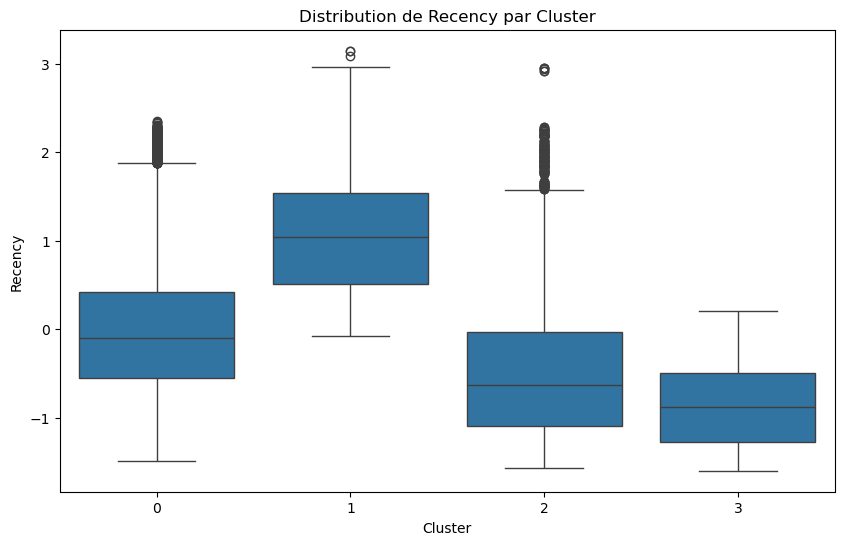

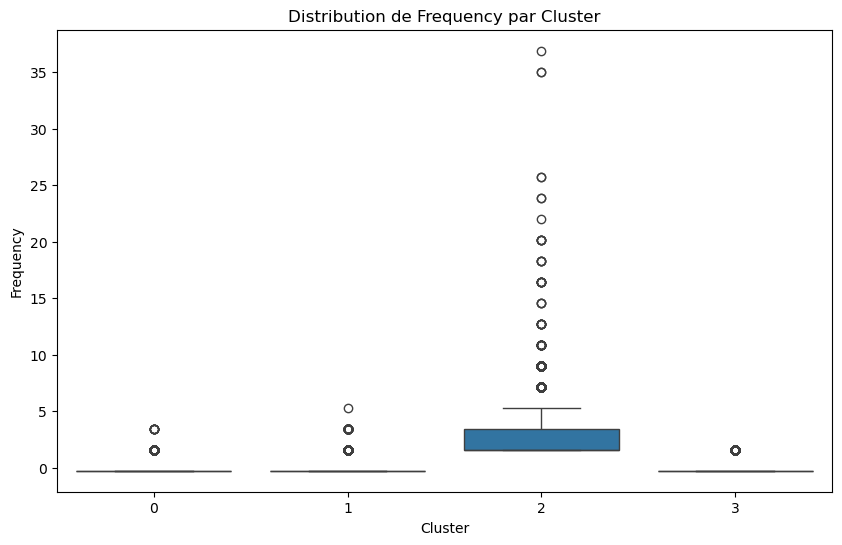

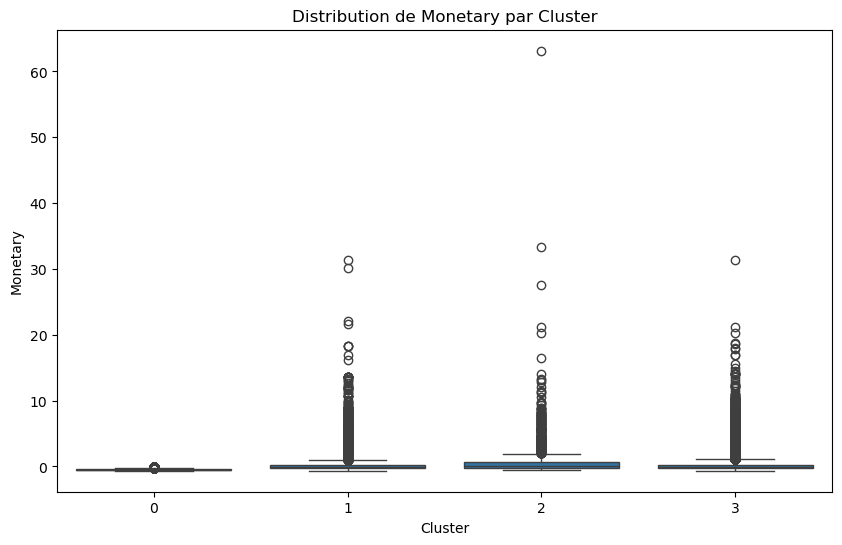

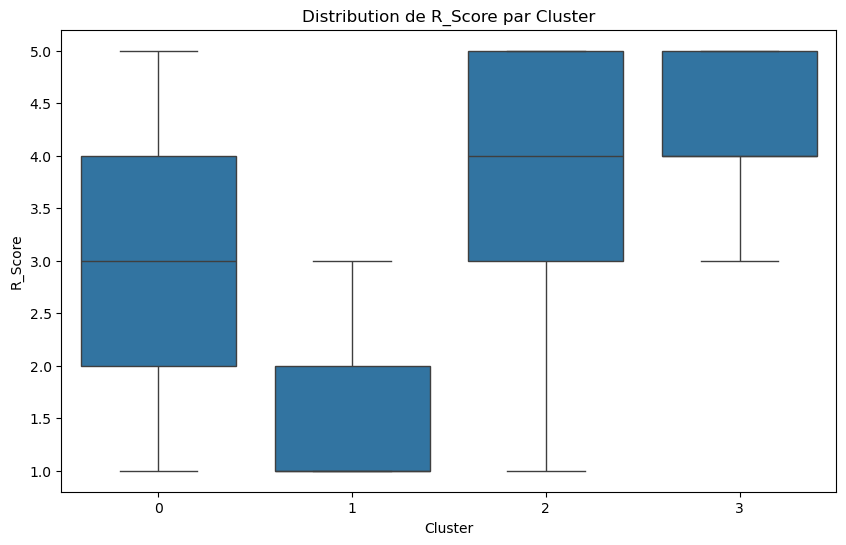

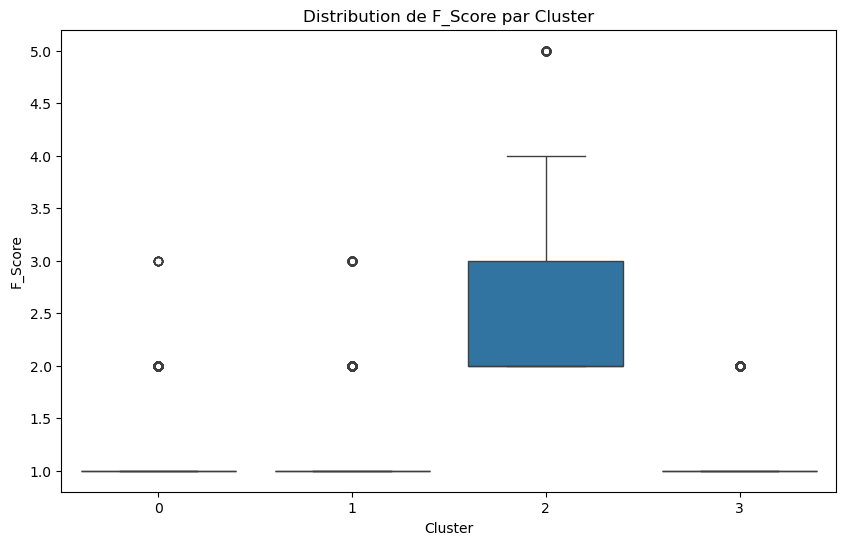

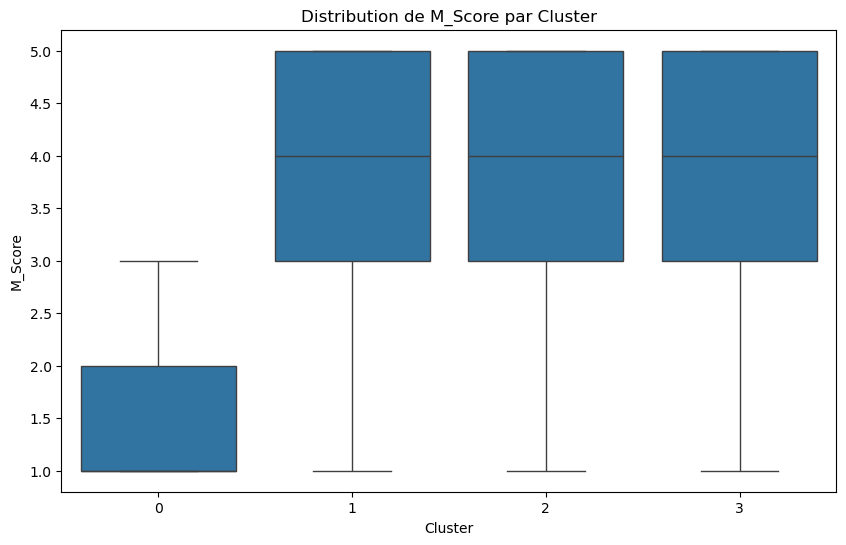

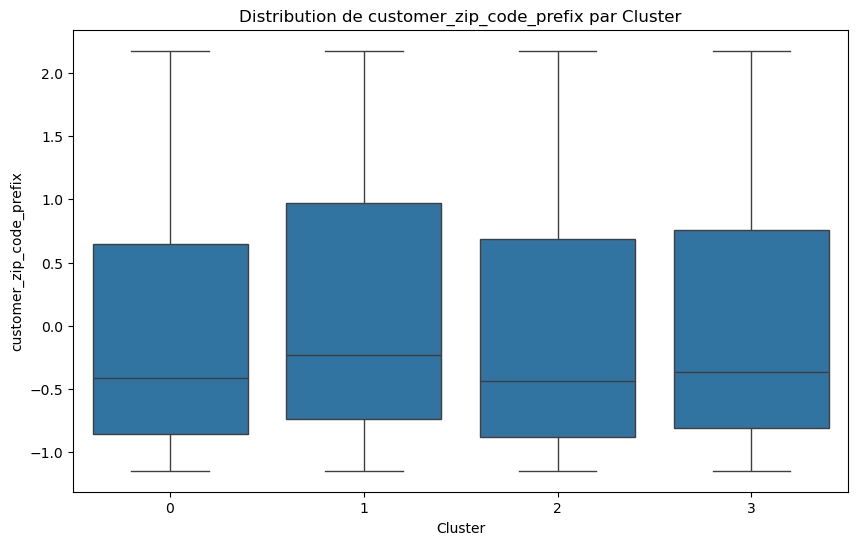

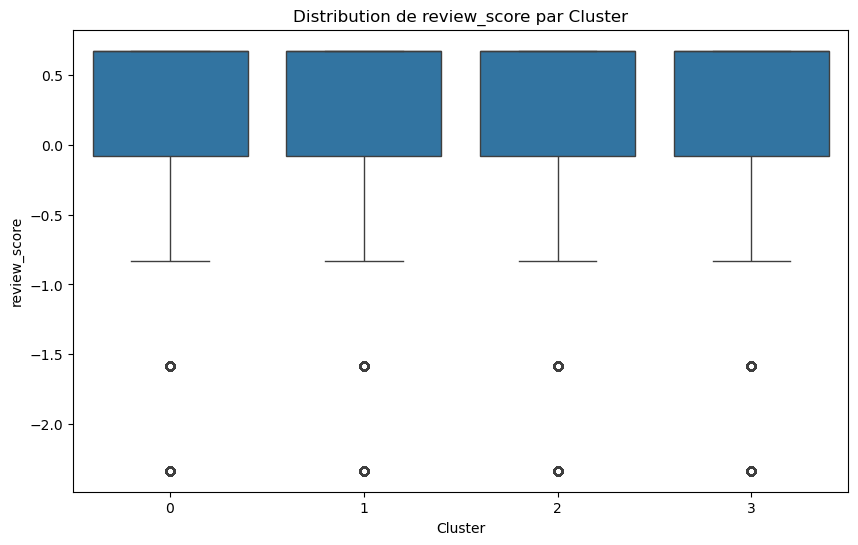

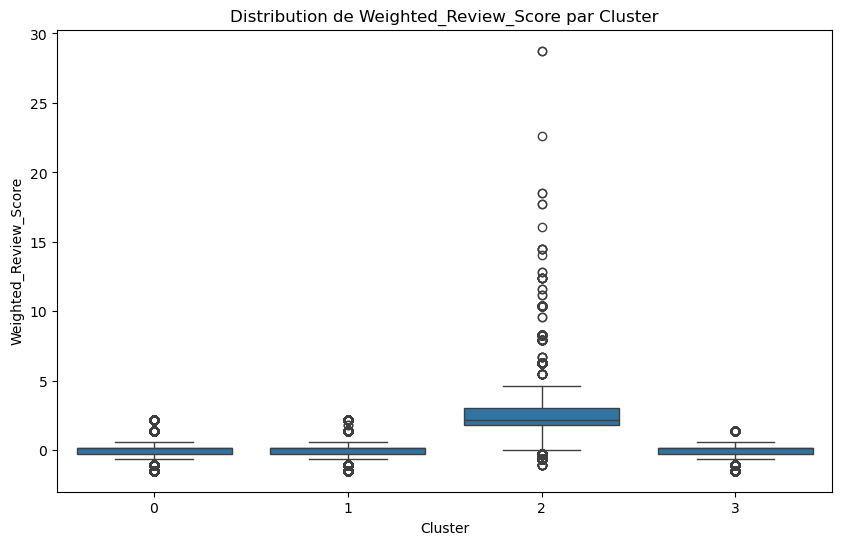

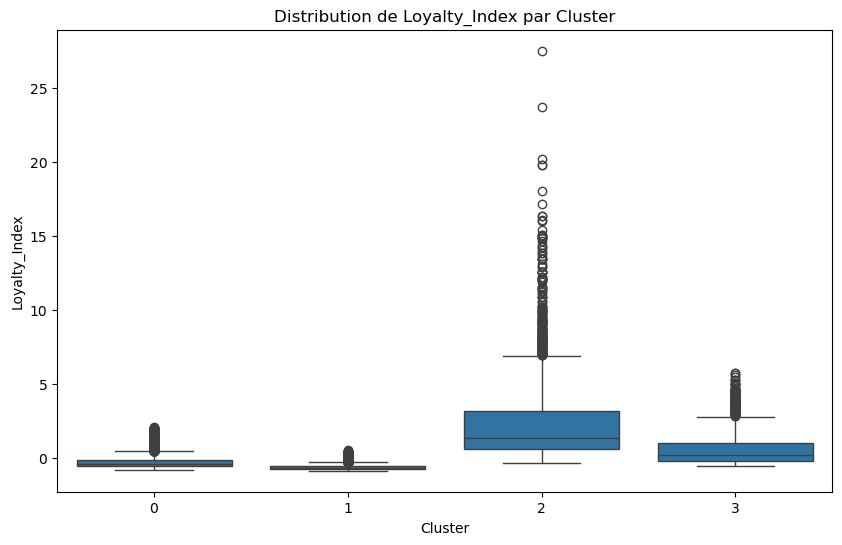

In [40]:
# Liste des features à visualiser
features_to_plot = ['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'customer_zip_code_prefix', 'review_score', 
                    'Weighted_Review_Score', 'Loyalty_Index'] 

# Création de boxplots pour chaque feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=rfm_no_cat)
    plt.title(f"Distribution de {feature} par Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

#### RFM + Variables numériques + Variables catégorielles T-SNE

In [42]:
# Appliquer K-means pour créer des clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df) 

In [44]:
# Appliquer t-SNE pour réduire les dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(rfm_df.drop(columns=['Cluster'], errors='ignore')) 

In [46]:
# Créer un DataFrame pour visualiser les résultats
data_tsne_df = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2'])
if 'Cluster' in rfm_df.columns:
    data_tsne_df['Cluster'] = rfm_df.loc[data_tsne_df.index, 'Cluster']

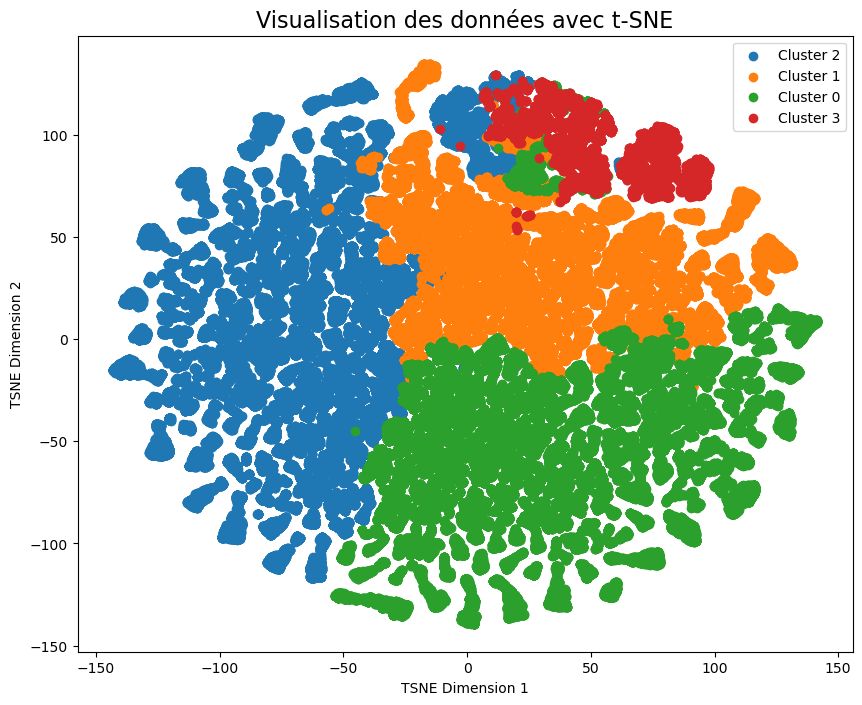

In [48]:
plt.figure(figsize=(10, 8))

# Tracer les points par cluster
for cluster in data_tsne_df['Cluster'].unique():
    plt.scatter(
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE1'],
        data_tsne_df[data_tsne_df['Cluster'] == cluster]['TSNE2'],
        label=f'Cluster {cluster}'
    )

plt.title("Visualisation des données avec t-SNE", fontsize=16)
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.legend()
plt.show()

Observations :

    - Cluster 2 :
        Représente la zone la plus étendue.
        Bien séparé des autres clusters, ce qui suggère que les points partagent des caractéristiques communes.
        La densité élevée et la large couverture montrent qu'il s'agit probablement du groupe dominant ou le plus représenté dans l'ensemble des données.

    - Cluster 0 :
        Bien distinct et situé dans une région compacte en bas à droite.
        Une densité assez forte, indiquant des observations homogènes au sein de ce cluster.

    - Cluster 3 :
        Localisé dans une région compacte, mais adjacent au cluster rouge (Cluster 1).
        Bien défini et distinct, mais montre une proximité avec Cluster 1, ce qui peut indiquer un chevauchement dans les caractéristiques des données.

    - Cluster Cluster 1 :
        Le plus petit cluster, situé en haut du graphique.
        Compact, mais proche de Cluster 3 et légèrement dispersé.
        Cela peut indiquer un sous-groupe spécifique ou un cluster moins bien défini.

In [51]:
# Calculer les moyennes des features par cluster
cluster_summary = rfm_df.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_summary)

Statistiques descriptives par cluster :
          Recency  Frequency  Monetary   R_Score   F_Score   M_Score  \
Cluster                                                                
0       -0.682449  -0.215148 -0.400155  3.996013  1.025884  1.968106   
1       -0.503408  -0.167104  0.687858  3.715395  1.051754  4.543493   
2        1.081726  -0.133080 -0.181931  1.458146  1.070074  2.725470   
3       -0.370771   3.059808  0.473465  3.513921  2.526888  3.995995   

         customer_zip_code_prefix  review_score  Weighted_Review_Score  \
Cluster                                                                  
0                       -0.080161      0.019049              -0.166229   
1                        0.047927     -0.074441              -0.202240   
2                        0.050390      0.026030              -0.084703   
3                       -0.049143      0.062280               2.594531   

         Loyalty_Index  Payment_credit_card  Payment_debit_card  \
Cluster        

Observations :

Clients à prioriser :

    Cluster 3 : Ce sont les clients les plus précieux, avec une forte fréquence et des dépenses élevées. Ils méritent des offres personnalisées et des programmes de fidélité.
    Cluster 2 : Clients récents et actifs, avec un potentiel de fidélisation élevé.

Clients à réengager :

    Cluster 1 : Clients occasionnels mais à forte valeur. Ils nécessitent des incitations pour augmenter leur fréquence d’achat.
    Cluster 0 : Clients récents mais peu actifs. Une stratégie d’activation pourrait améliorer leur contribution.

Segmentation des campagnes :

    Catégories de produits : Les clusters 2 et 3 montrent une diversité d’intérêts, nécessitant des campagnes ciblées sur leurs catégories préférées (electronics, food, home furniture).
    Modes de paiement : Capitalisez sur les préférences de paiement pour proposer des offres adaptées (ex. cashback pour les paiements par carte).

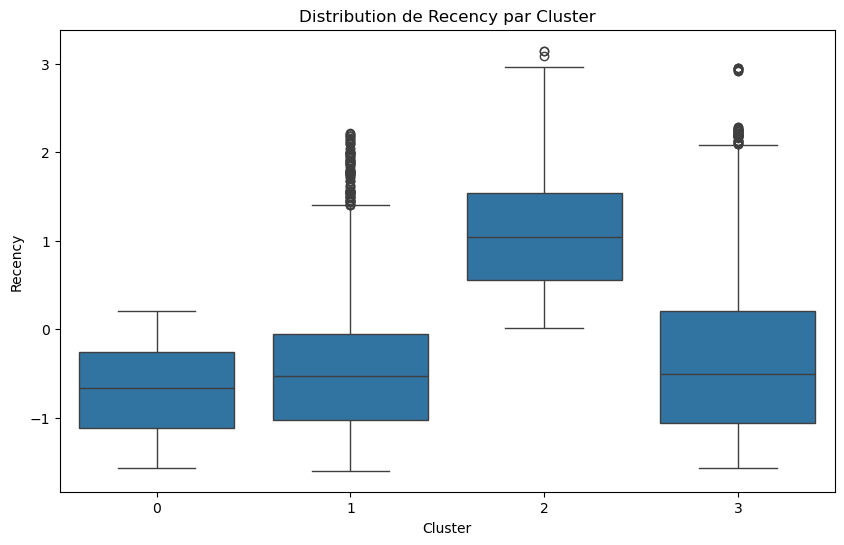

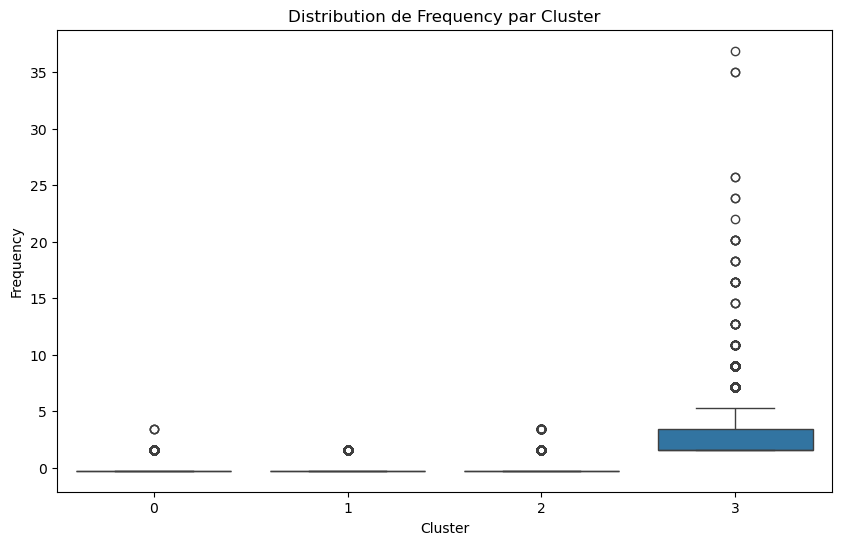

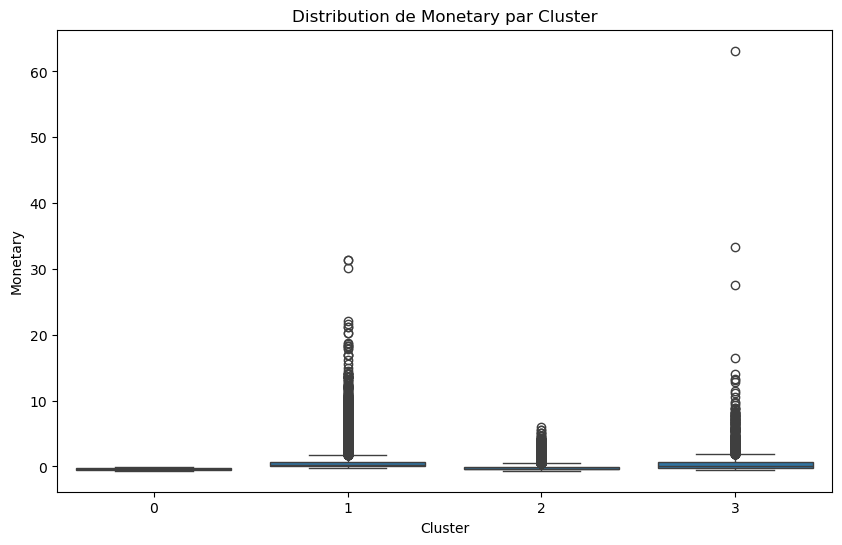

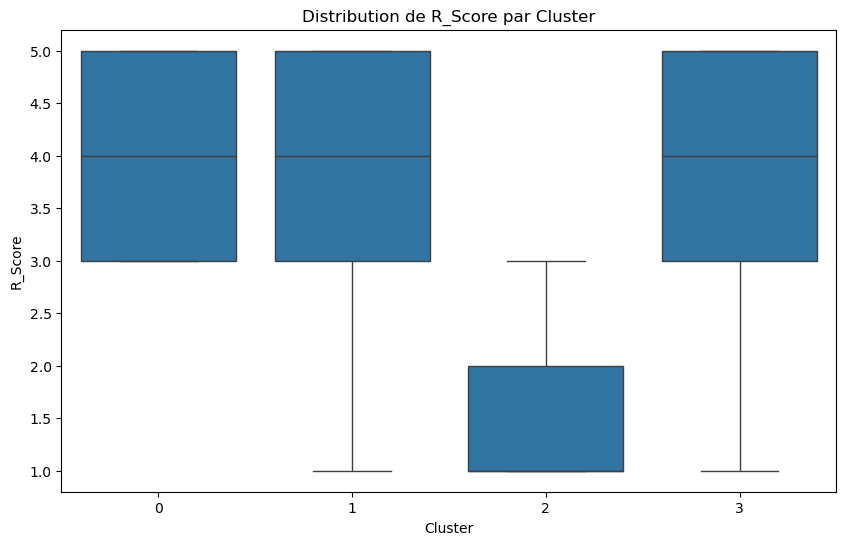

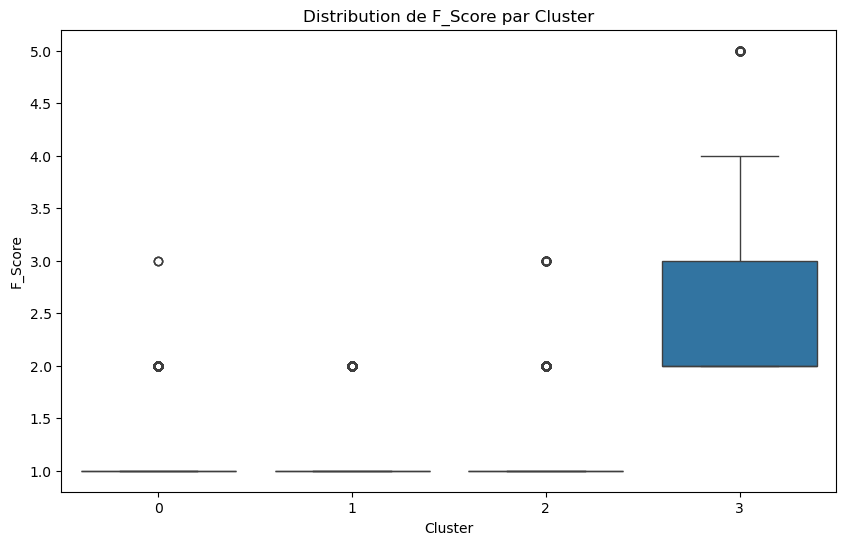

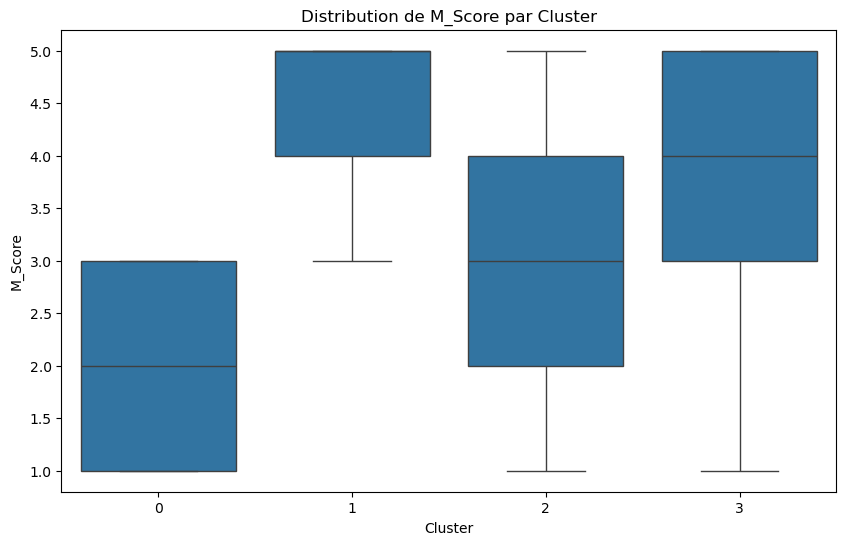

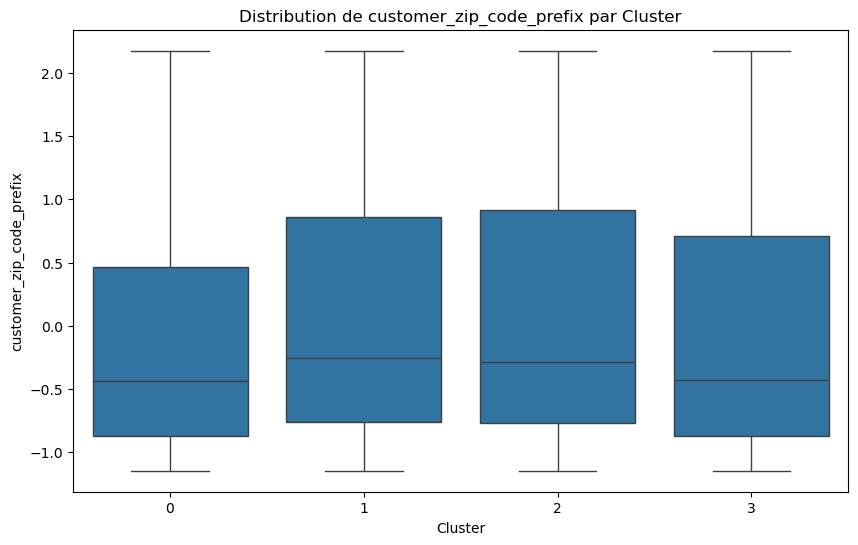

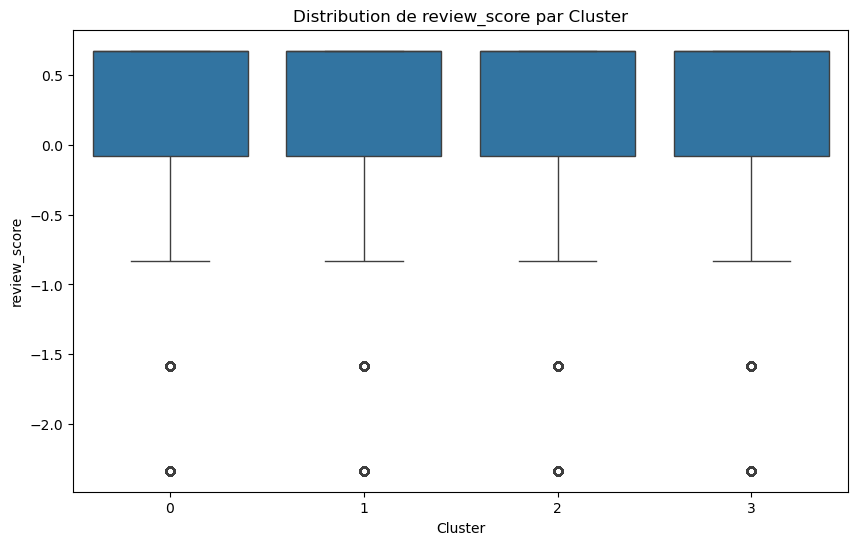

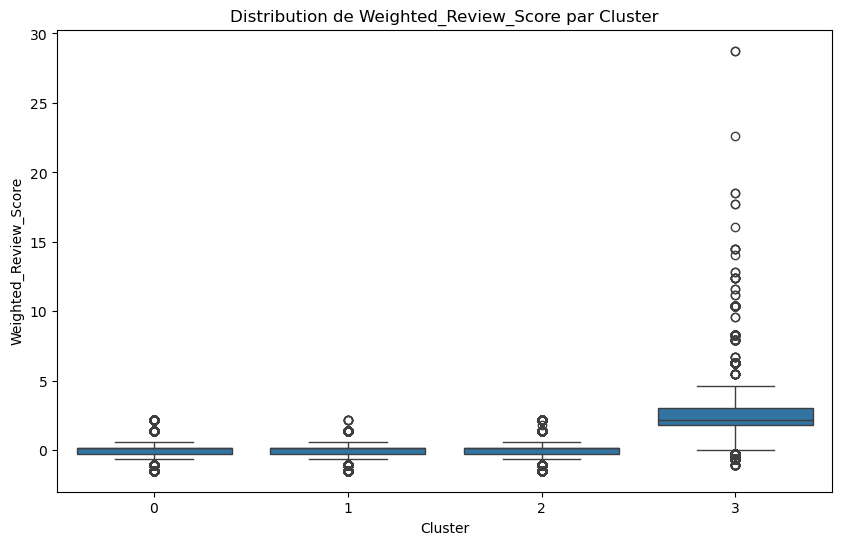

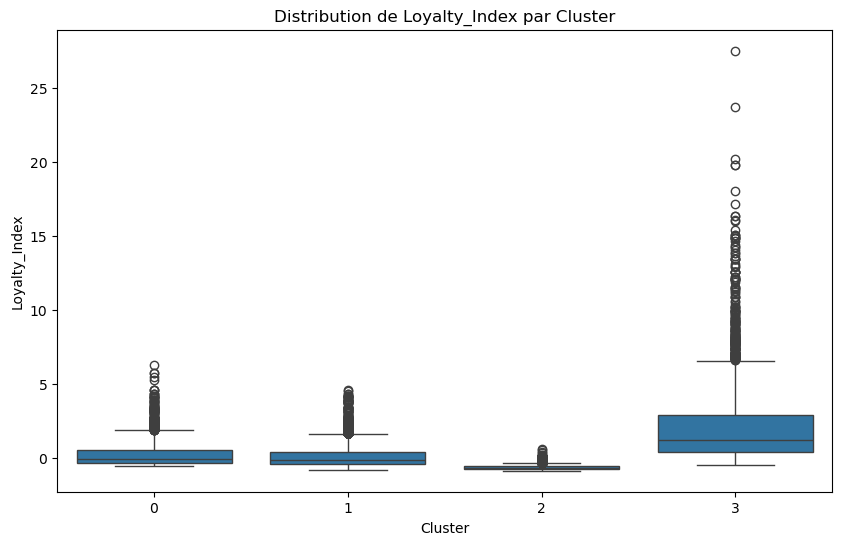

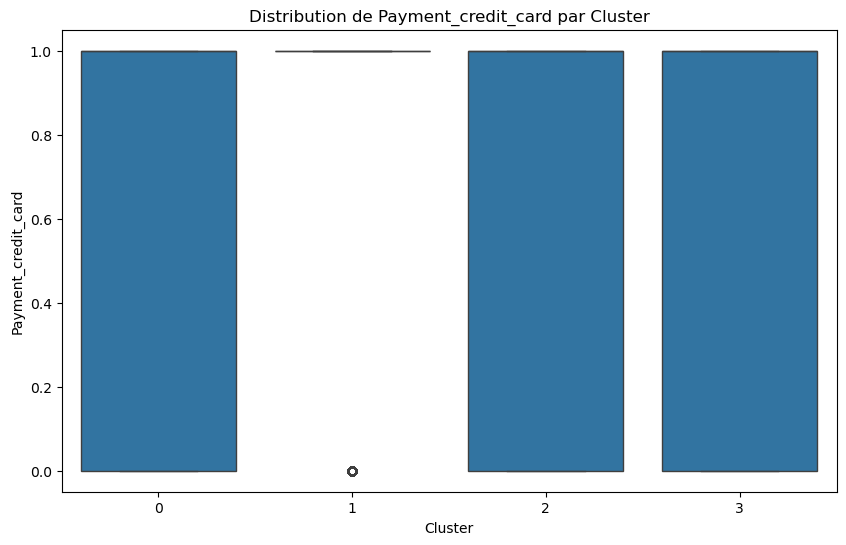

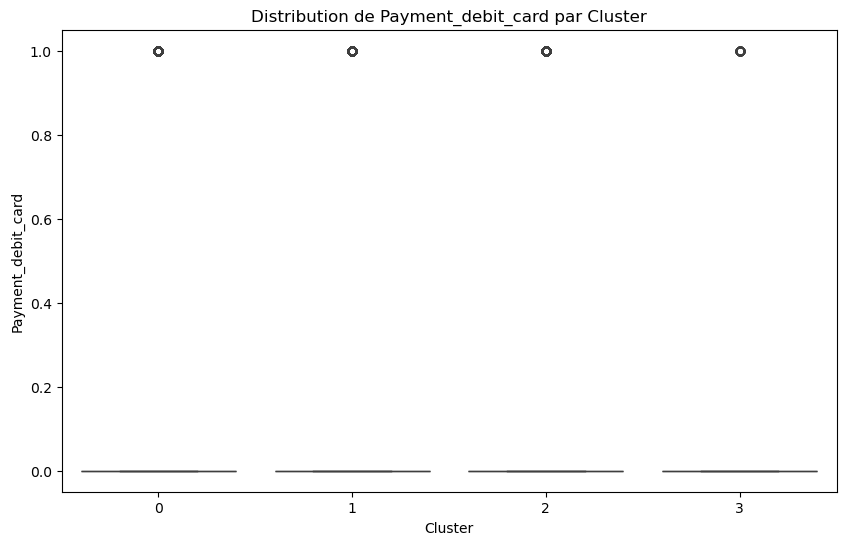

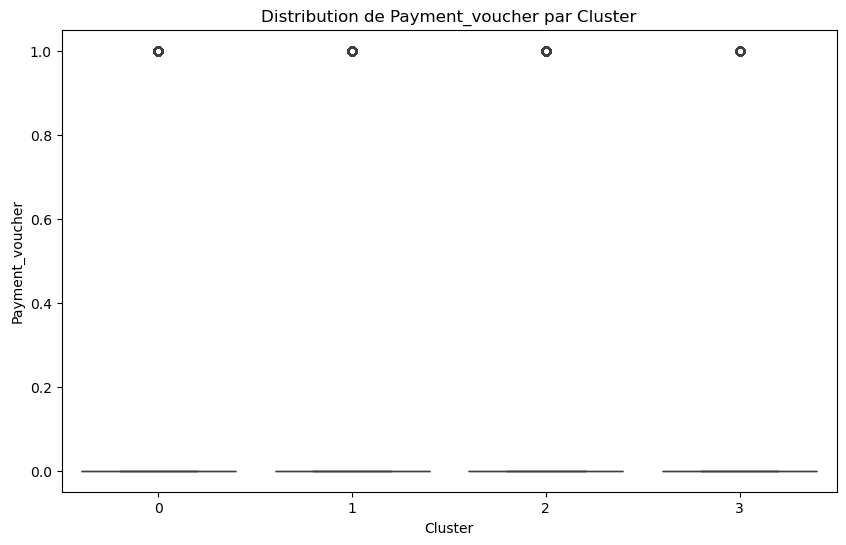

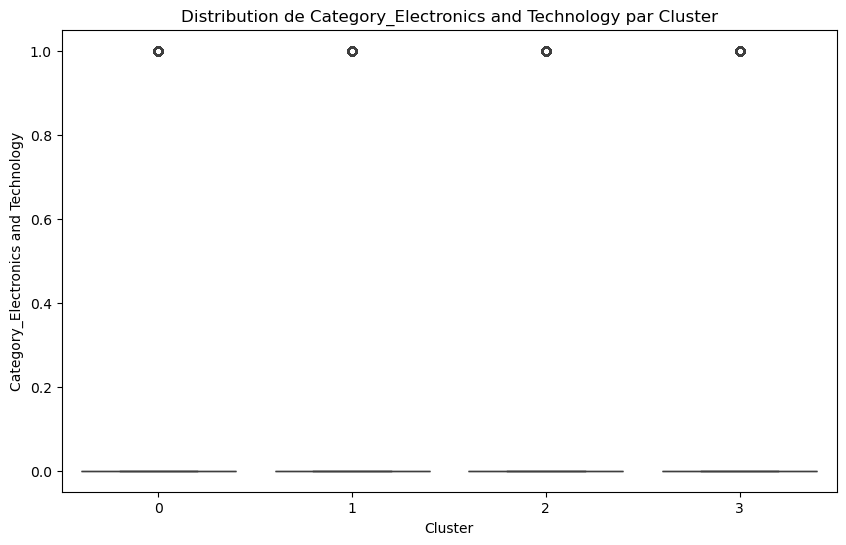

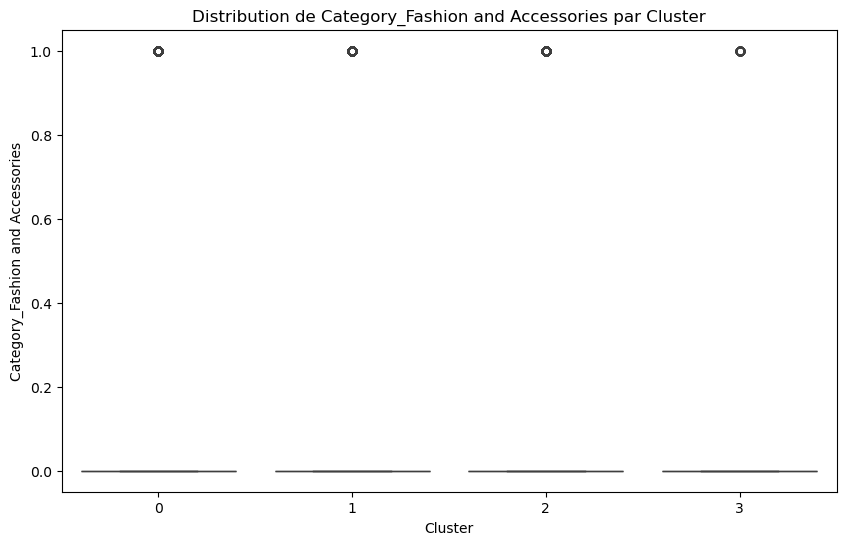

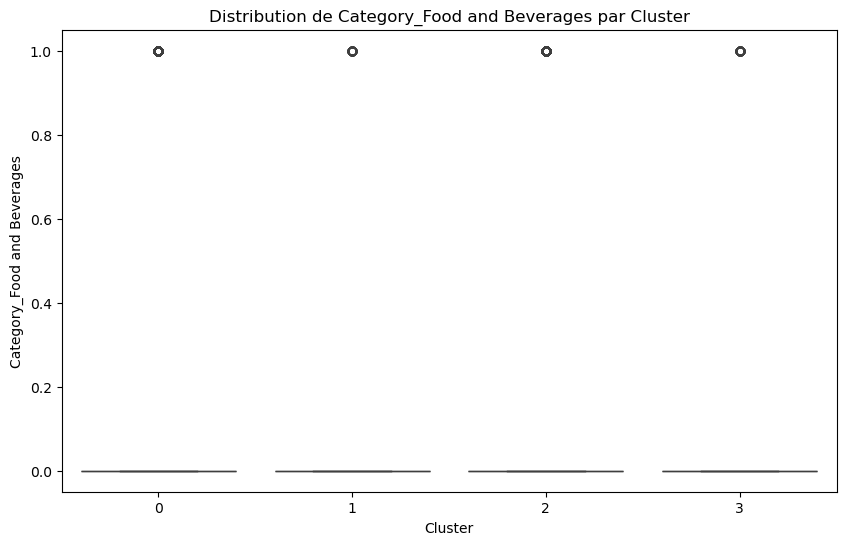

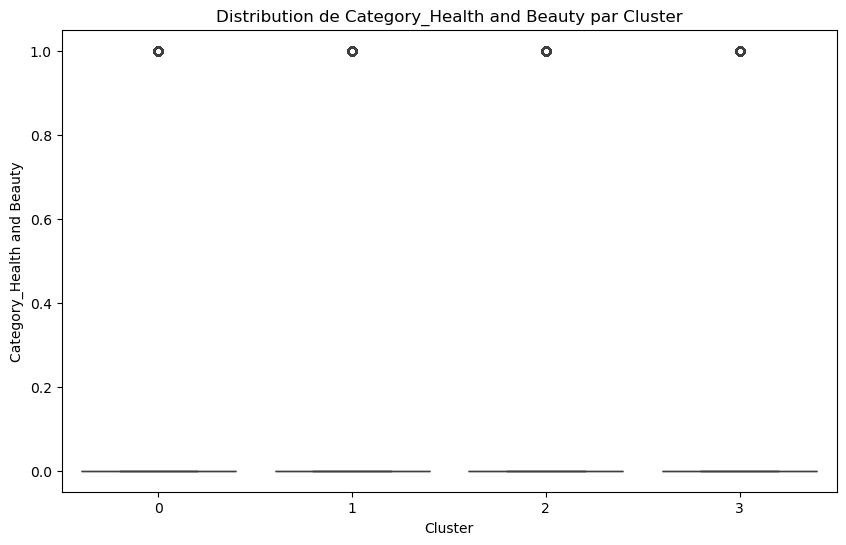

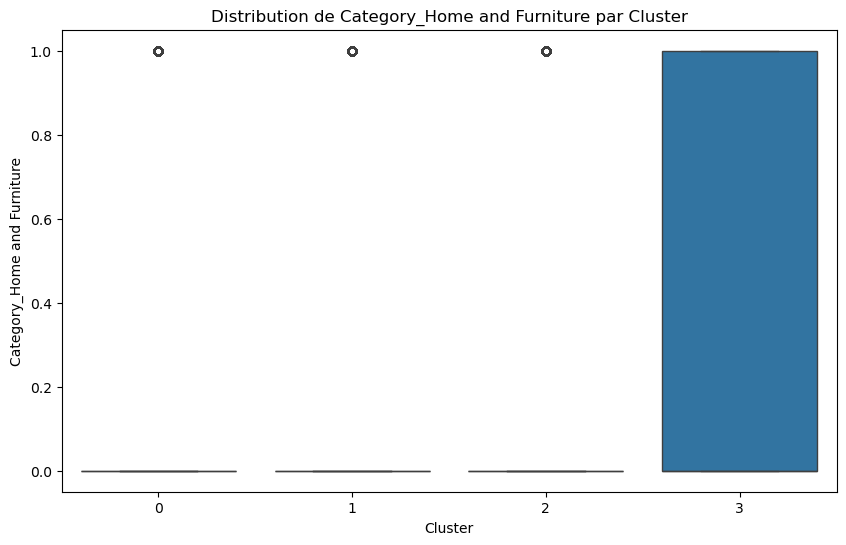

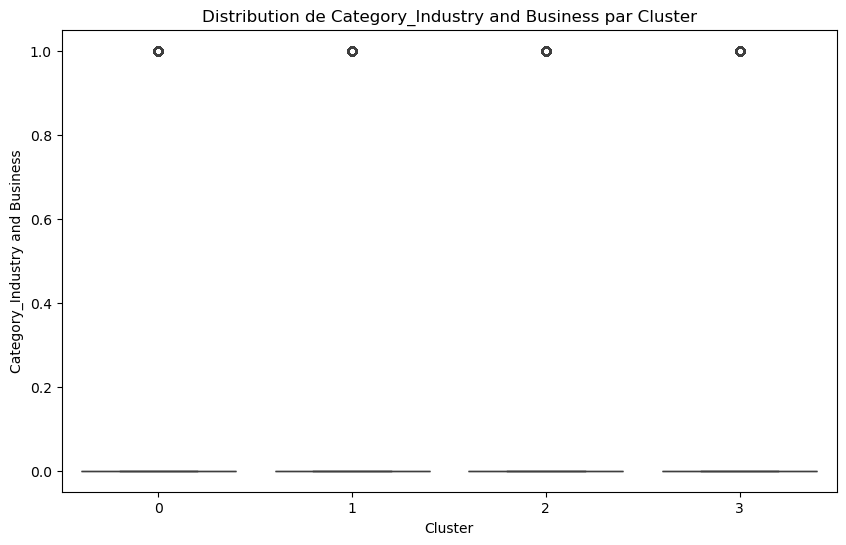

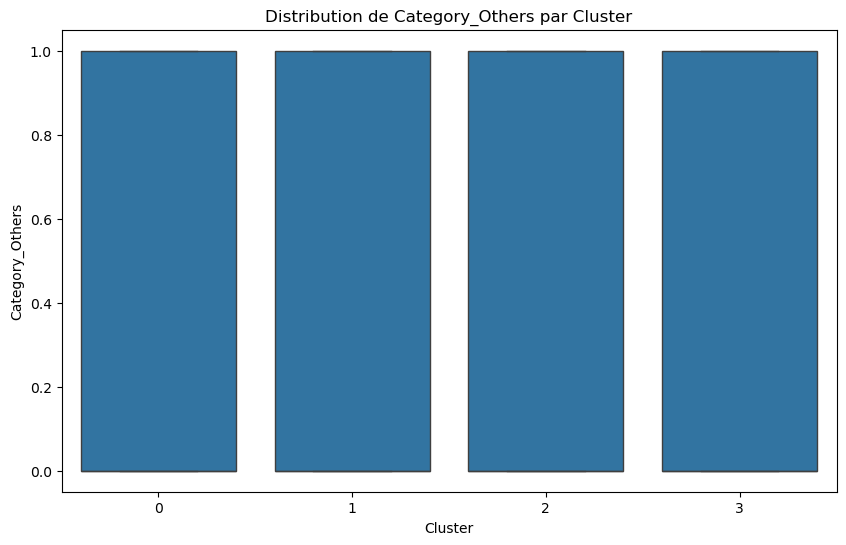

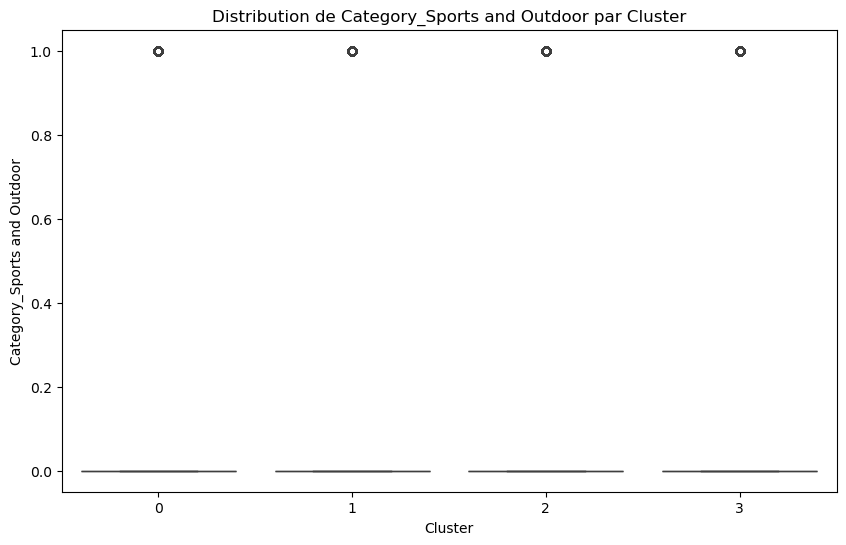

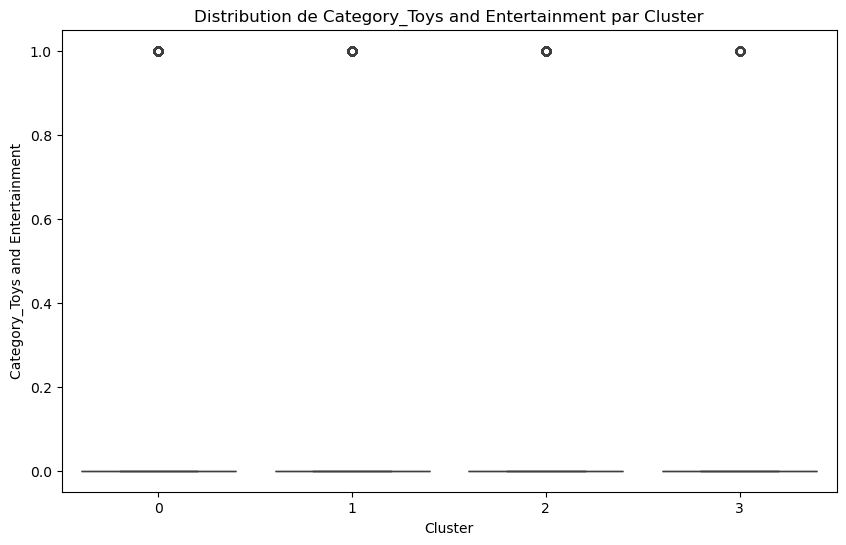

In [57]:
# Liste des features à visualiser
features_to_plot = ['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'customer_zip_code_prefix', 'review_score', 
                    'Weighted_Review_Score', 'Loyalty_Index', 'Payment_credit_card', 'Payment_debit_card', 'Payment_voucher',
                    'Category_Electronics and Technology', 'Category_Fashion and Accessories', 'Category_Food and Beverages',
                    'Category_Health and Beauty', 'Category_Home and Furniture', 'Category_Industry and Business', 'Category_Others', 
                    'Category_Sports and Outdoor', 'Category_Toys and Entertainment'] 

# Création de boxplots pour chaque feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=rfm_df)
    plt.title(f"Distribution de {feature} par Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

### DBSCAN

In [69]:
# Tester différentes valeurs de eps et min_samples
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_tsne_df[['TSNE1', 'TSNE2']])
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        print(f"eps={eps}, min_samples={min_samples}, Nombre de clusters détectés: {n_clusters}")

eps=0.3, min_samples=3, Nombre de clusters détectés: 8027
eps=0.3, min_samples=5, Nombre de clusters détectés: 5907
eps=0.3, min_samples=10, Nombre de clusters détectés: 2802
eps=0.5, min_samples=3, Nombre de clusters détectés: 5271
eps=0.5, min_samples=5, Nombre de clusters détectés: 4573
eps=0.5, min_samples=10, Nombre de clusters détectés: 3378
eps=0.7, min_samples=3, Nombre de clusters détectés: 3749
eps=0.7, min_samples=5, Nombre de clusters détectés: 3380
eps=0.7, min_samples=10, Nombre de clusters détectés: 2923
eps=1.0, min_samples=3, Nombre de clusters détectés: 2388
eps=1.0, min_samples=5, Nombre de clusters détectés: 2252
eps=1.0, min_samples=10, Nombre de clusters détectés: 2088


Observations :

    Grande variabilité des clusters :
        Le nombre de clusters varie fortement (de 2088 à 8027) en fonction des paramètres, indiquant que la structure des données est sensible aux choix de eps et min_samples.

    Choix des paramètres :
        Un eps trop petit peut conduire à de nombreux clusters très petits ou isolés, ce qui peut être difficile à interpréter.
        Un min_samples trop élevé peut ignorer des clusters légitimes et augmenter le nombre de points considérés comme du bruit.

Les paramètres avec eps=0.5 ou 0;7 et min_samples= 10 semblent prometteurs :

    Nombre de clusters modéré (3378-2923).
    Probablement un bon compromis entre bruit et cohésion.

In [82]:
pip install hdbscan


   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   --- ------------------------------------ 61.4/726.2 kB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 225.3/726.2 kB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 399.4/726.2 kB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 532.5/726.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 726.2/726.2 kB 3.3 MB/s eta 0:00:00


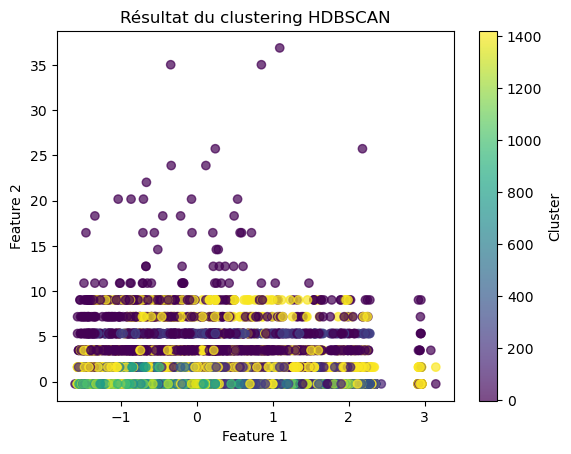

Clusters trouvés : (array([  -1,    0,    1, ..., 1416, 1417, 1418], dtype=int64), array([1391,   18,   11, ...,   12,   12, 4670], dtype=int64))
Cluster
 1418    4670
 1410    3925
 1415    3373
-1       1391
 1414    1282
         ... 
 652       10
 14        10
 1393      10
 236       10
 1122      10
Name: count, Length: 1420, dtype: int64


In [86]:
# Appliquer HDBSCAN sur les données standardisées
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.5)
clusters = hdbscan_cluster.fit_predict(rfm_df) 

# Ajouter les clusters au DataFrame
rfm_df['Cluster'] = clusters

# Visualisation des clusters 
plt.scatter(rfm_df.iloc[:, 0], rfm_df.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Résultat du clustering HDBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Résultat des clusters
print("Clusters trouvés :", np.unique(clusters, return_counts=True)) 
print(rfm_df['Cluster'].value_counts())  

Trop grand nombre de clusters qui rendent notre analyse plus compliqué. Essayé d'utiliser un autre dataframe

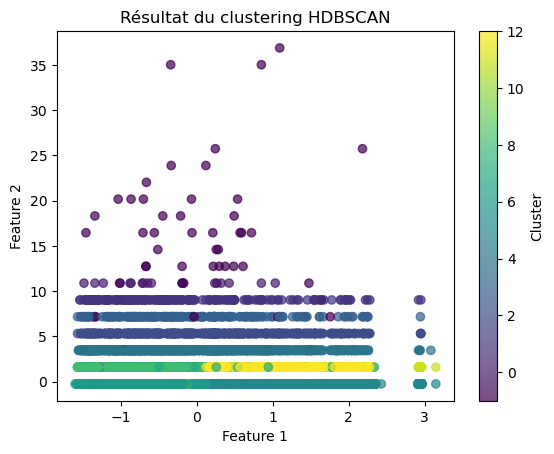

Clusters trouvés : (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64), array([  115,    18,   193,   503,   196,  1315, 36986, 50678,   584,
        3903,    26,  1142,    22,  2985], dtype=int64))
Cluster
 6     50678
 5     36986
 8      3903
 12     2985
 4      1315
 10     1142
 7       584
 2       503
 3       196
 1       193
-1       115
 9        26
 11       22
 0        18
Name: count, dtype: int64


In [90]:
# Appliquer HDBSCAN sur les données standardisées
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.5)
clusters = hdbscan_cluster.fit_predict(rfm)  

# Ajouter les clusters au DataFrame
rfm['Cluster'] = clusters

# Visualisation des clusters 
plt.scatter(rfm.iloc[:, 0], rfm.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Résultat du clustering HDBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Résultat des clusters
print("Clusters trouvés :", np.unique(clusters, return_counts=True))  
print(rfm['Cluster'].value_counts())  

Observations :

    Dominance de 2 clusters :
        Les clusters 6 et 5 couvrent une majorité des données. Cela peut refléter des groupes principaux homogènes dans les données.

    Petits clusters et bruit :
        Les petits clusters (3 et 12) et les points étiquetés comme bruit (-1) pourraient correspondre à des anomalies ou des sous-groupes d’intérêt particulier.
        Ces observations pourraient nécessiter une exploration détaillée pour évaluer leur pertinence.

    Structure des données :
        La grande variabilité dans les tailles des clusters montre que vos données ont des zones denses bien définies, mais aussi des groupes plus isolés.

Au vue des différentes observations on peut déduire qu'utiliser DBSCAN est moins intéressant que le K-Means.

Pour la suite nous utiliserons le K-means du dataframe rfm_df qui offrent un large choix de variables.